<a href="https://www.kaggle.com/code/maicmi/dynamic-web-scraping-using-selenium?scriptVersionId=131553249" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Dynamic Web Scraping using Selenium and chromedriver

Be aware, while scraping a website:
* Don't scrape a website if it's terms and conditions restrict it.
* Don't overload the website's server with requests.
* Mimic human activity so that the website isn't overloaded with requests. This also protects you from getting blacklisted.
* Read the website's robots.txt to identify the pages prohibited from accessing
* Keep on switching user-agents

We already have google spreadsheet and .read_html() from Pandas. They're good for static website.<br>
Selenium with chromedriver is good for dynamic website scraping and it also fix the font problem.

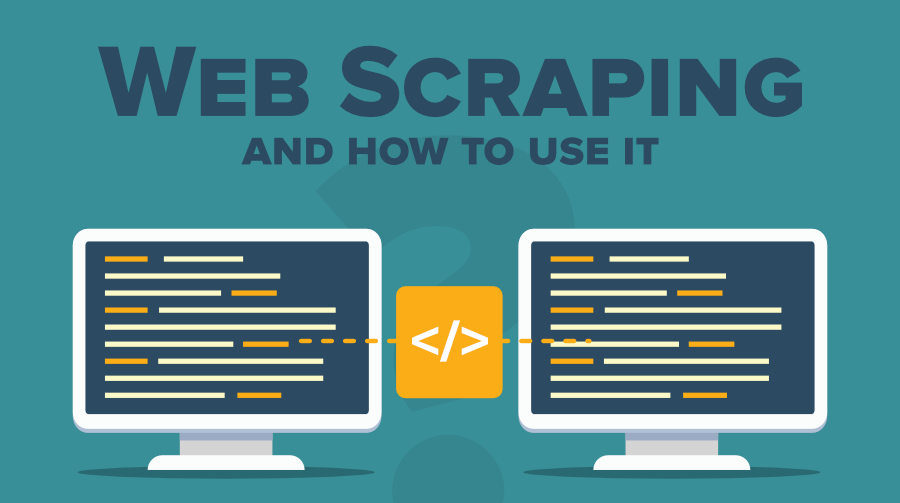

# 1. Start install and import packages

In [1]:
!pip install selenium # install selenium for web scraping

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 384.9/384.9 kB 21.6 MB/s eta 0:00:00


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from selenium import webdriver # Selenium, webdriver to scrap dynamic website

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# 2. Show that .read_html() is not for dynamic website and we cannot read the font.

In [3]:
setth = pd.read_html('https://www.set.or.th/th/market/index/set100/overview')[1]
setth

,à¸«à¸¥à¸±à¸à¸à¸£à¸±à¸à¸¢à¹ (Click to sort Ascending),à¹à¸à¸´à¸ (Click to sort Ascending),à¸ªà¸¹à¸à¸ªà¸¸à¸ (Click to sort Ascending),à¸à¹à¸³à¸ªà¸¸à¸ (Click to sort Ascending),à¸¥à¹à¸²à¸ªà¸¸à¸ (Click to sort Ascending),à¹à¸à¸¥à¸µà¹à¸¢à¸à¹à¸à¸¥à¸ (Click to sort Ascending),% à¹à¸à¸¥à¸µà¹à¸¢à¸à¹à¸à¸¥à¸ (Click to sort Ascending),à¹à¸ªà¸à¸­à¸à¸·à¹à¸­ (Click to sort Ascending),à¹à¸ªà¸à¸­à¸à¸²à¸¢ (Click to sort Ascending),à¸à¸£à¸´à¸¡à¸²à¸ (à¸«à¸¸à¹à¸) (Click to sort Ascending),à¸¡à¸¹à¸¥à¸à¹à¸² ('000 à¸à¸²à¸) (Click to sort Ascending)
0,à¹à¸¡à¹à¸¡à¸µà¸à¹à¸­à¸¡à¸¹à¸¥,à¹à¸¡à¹à¸¡à¸µà¸à¹à¸­à¸¡à¸¹à¸¥,à¹à¸¡à¹à¸¡à¸µà¸à¹à¸­à¸¡à¸¹à¸¥,à¹à¸¡à¹à¸¡à¸µà¸à¹à¸­à¸¡à¸¹à¸¥,à¹à¸¡à¹à¸¡à¸µà¸à¹à¸­à¸¡à¸¹à¸¥,à¹à¸¡à¹à¸¡à¸µà¸à¹à¸­à¸¡à¸¹à¸¥,à¹à¸¡à¹à¸¡à¸µà¸à¹à¸­à¸¡à¸¹à¸¥,à¹à¸¡à¹à¸¡à¸µà¸à¹à¸­à¸¡à¸¹à¸¥,à¹à¸¡à¹à¸¡à¸µà¸à¹à¸­à¸¡à¸¹à¸¥,à¹à¸¡à¹à¸¡à¸µà¸à¹à¸­à¸¡à¸¹à¸¥,à¹à¸¡à¹à¸¡à¸µà¸à¹à¸­à¸¡à¸¹à¸¥


# 3. Install `chromedriver` for web scraping
* Install chromedriver and copy to `/usr/bin`
* If you use jupyter notebook on your local machine, you can download chrome driver from https://chromedriver.chromium.org/ and you should use the same version as your Chrome browser.


In [4]:
# install google chrome
!wget https://dl.google.com/linux/linux_signing_key.pub
!sudo apt-key add linux_signing_key.pub
!echo 'deb [arch=amd64] http://dl.google.com/linux/chrome/deb/ stable main' >> /etc/apt/sources.list.d/google-chrome.list
!sudo apt-get -y update
!sudo apt-get install -y google-chrome-stable

# install chromedriver
# !apt-get install -y qq unzip
!wget -O /tmp/chromedriver.zip http://chromedriver.storage.googleapis.com/`curl -sS chromedriver.storage.googleapis.com/LATEST_RELEASE`/chromedriver_linux64.zip
!unzip /tmp/chromedriver.zip chromedriver -d /usr/local/bin/

--2023-05-30 08:22:20--  https://dl.google.com/linux/linux_signing_key.pub
Resolving dl.google.com (dl.google.com)... 108.177.98.93, 108.177.98.190, 108.177.98.136, ...
Connecting to dl.google.com (dl.google.com)|108.177.98.93|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14605 (14K) [application/octet-stream]
Saving to: ‘linux_signing_key.pub’

linux_signing_key.p 100%[===================>]  14.26K  --.-KB/s    in 0s      

2023-05-30 08:22:21 (59.9 MB/s) - ‘linux_signing_key.pub’ saved [14605/14605]

OK
Get:1 http://dl.google.com/linux/chrome/deb stable InRelease [1825 B]
Get:2 http://packages.cloud.google.com/apt gcsfuse-focal InRelease [5002 B]
Get:3 https://packages.cloud.google.com/apt cloud-sdk InRelease [6361 B]
Get:4 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Hit:5 http://archive.ubuntu.com/ubuntu focal InRelease
Get:6 http://dl.google.com/linux/chrome/deb stable/main amd64 Packages [1075 B]
Get:7 http://archive.ubuntu.com/u

In [5]:
# To check Google Chrome's version
!google-chrome --version

# To check Chrome Driver's version
!chromedriver -v

Google Chrome 113.0.5672.126 
ChromeDriver 113.0.5672.63 (0e1a4471d5ae5bf128b1bd8f4d627c8cbd55f70c-refs/branch-heads/5672@{#912})


# 4. Use Chromedriver to get HTML and use .read_html() to get the table.

In [6]:
import time
from selenium import webdriver
url = "https://www.set.or.th/th/market/index/set100/overview"

chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--headless')
chrome_options.add_argument('--disable-gpu')
chrome_options.add_argument('--disable-dev-shm-usage')
chrome_options.add_argument("--window-size=1920,1080")
driver = webdriver.Chrome(options=chrome_options)
driver.get(url)

# Open Page Source
data = driver.page_source

In [7]:
df = pd.read_html(data)[1]
df.head()

,หลักทรัพย์ (Click to sort Ascending),เปิด (Click to sort Ascending),สูงสุด (Click to sort Ascending),ต่ำสุด (Click to sort Ascending),ล่าสุด (Click to sort Ascending),เปลี่ยนแปลง (Click to sort Ascending),% เปลี่ยนแปลง (Click to sort Ascending),เสนอซื้อ (Click to sort Ascending),เสนอขาย (Click to sort Ascending),ปริมาณ (หุ้น) (Click to sort Ascending),มูลค่า ('000 บาท) (Click to sort Ascending)
0,AAV,2.74,2.74,2.68,2.70,-0.04,-1.46,2.70,2.72,12065536,32659.29
1,ACE,1.98,1.98,1.91,1.93,-0.02,-1.03,1.92,1.93,14807852,28909.39
2,ADVANC,212.00,213.00,211.00,212.00,0.00,0.00,211.00,212.00,2146844,454225.64
3,AMATA,22.20,22.30,21.90,22.20,0.00,0.00,22.10,22.20,2916774,64658.88
4,AOT,70.50,70.75,70.25,70.75,0.25,0.35,70.50,70.75,9672562,683193.97


In [8]:
# Fix the column to easy to read and use it.
clean_column = []
for c in df.columns:
    clean_column.append(c.replace('  (Click to sort Ascending)',''))
    
df.columns = clean_column
df.head()

,หลักทรัพย์,เปิด,สูงสุด,ต่ำสุด,ล่าสุด,เปลี่ยนแปลง,% เปลี่ยนแปลง,เสนอซื้อ,เสนอขาย,ปริมาณ (หุ้น),มูลค่า ('000 บาท)
0,AAV,2.74,2.74,2.68,2.70,-0.04,-1.46,2.70,2.72,12065536,32659.29
1,ACE,1.98,1.98,1.91,1.93,-0.02,-1.03,1.92,1.93,14807852,28909.39
2,ADVANC,212.00,213.00,211.00,212.00,0.00,0.00,211.00,212.00,2146844,454225.64
3,AMATA,22.20,22.30,21.90,22.20,0.00,0.00,22.10,22.20,2916774,64658.88
4,AOT,70.50,70.75,70.25,70.75,0.25,0.35,70.50,70.75,9672562,683193.97


🎉🎉🎉 Congratulation!!! You can get the information from dynamic website and also fix non english font.

# Example Top 5 values

In [9]:
top5_value = df.nlargest(5,"มูลค่า ('000 บาท)")[["หลักทรัพย์","มูลค่า ('000 บาท)"]].style.format({"มูลค่า ('000 บาท)": "{:,.2f}"}).hide(axis="index")
top5_value

หลักทรัพย์,มูลค่า ('000 บาท)
KBANK,"1,763,016.68"
CPALL,"1,445,599.66"
DELTA,"980,266.15"
SCB,"917,453.43"
SCC,"701,550.32"
